In [1]:
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)
import numpy as np
import matplotlib.pyplot as plt
import torch.autograd
import torch
from train import *
from convexnn import *
from modelsnew import *    
import random

E:\Anaconda\lib\site-packages\sklearn\linear_model\least_angle.py:35: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps,
E:\Anaconda\lib\site-packages\sklearn\linear_model\least_angle.py:597: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps, copy_X=True, fit_path=True,
E:\Anaconda\lib\site-pa

In [2]:
def th(x):
    return np.where(x>0,1,0)
lr = 0.01          #### learning rate
beta_star = 1e-3   ### regularization parameter
noise_sigma = 0
seed = 42
random.seed(a=seed)
np.random.seed(seed=seed)
torch.manual_seed(seed)
torch.backends.cudnn.deterministic = True

In [3]:
########FOR CLASSIFICATION###########
######DATA GENERATION########
n,d = 100,20
n_test, n_train = 2000, n
big_num=1000     ##### The size of the representaton matrix H 
actv_type = "tanh"
X = np.random.randn(n,d)
X_test = np.random.randn(n_test,d)

X = np.concatenate((X,np.ones((n,1))),axis=1)
X_test = np.concatenate((X_test,np.ones((n_test,1))),axis=1)


m1,m2 = 20, 20         ##These are the number of neurons of the ground truth model
W1_ = np.random.uniform(low=-1,high=1,size=(d+1,m1))
W2_ = np.random.uniform(low=-1,high=1,size=(m1,m2))
W3_ = np.random.uniform(low=-1,high=1,size=(m2,))
if actv_type == "tanh":
    Y = np.tanh(np.tanh(X@W1_)@W2_)@W3_
noise = np.random.normal(loc=0,scale=noise_sigma,size=Y.shape)
Y = Y + noise
Y[Y<0] = -1
Y[Y>=0] = 1
if actv_type == "tanh":
    Y_test = np.tanh(np.tanh(X_test@W1_)@W2_)@W3_
noise = np.random.normal(loc=0,scale=noise_sigma,size=Y_test.shape)
Y_test = Y_test + noise
Y_test[Y_test<0] = -1
Y_test[Y_test>=0] = 1


d = X.shape[1]
nb_epoch = 2000
nb_neuron = big_num  
nb_neuron2 = n


n_train = n
beta = beta_star * n #Dont touch this, it is to get convenient results
###CONVEX TRAINING####
### CONVEX-PI APPROACH  #####
c3 = convex_nn_3layer(X, Y, X_test, Y_test, beta, nb_neuron, nb_epoch, n_train, n_test,big_num,rec_style="standard",rep_matrix="big_matrix")
cvxacc_relu_3_std,cvxacc_th0_3_std,\
cvxacc_th05_3_std,\
cvxacc_relu_3_std_training,cvxacc_th0_3_std_training,\
cvxacc_th05_3_std_training,\
optimal_value_3_std,std_3_time = c3.get_acc_loss_3layer()


### CONVEX-SVM APPROACH  #####
c3 = convex_nn_3layer(X, Y, X_test, Y_test, beta, nb_neuron, nb_epoch, n_train, n_test,big_num,rec_style="SVM",rep_matrix="big_matrix")
cvxacc_relu_3_svm,cvxacc_th0_3_svm,\
cvxacc_th05_3_svm,\
cvxacc_relu_3_svm_training,cvxacc_th0_3_svm_training,\
cvxacc_th05_3_svm_training,\
optimal_value_3_svm,svm_3_time = c3.get_acc_loss_3layer()


####NONCONVEX TRAINING#####

##### NONCONVEX-STE #######
STE_type = train('identity_3',X,Y,X_test,Y_test,beta,n_train,n_test,nb_neuron,nb_neuron2,nb_epoch,d,lr)
loss_vals_identity_3 ,test_time_identity_3,train_time_identity_3,time_identity_3 = STE_type.training()

##### NONCONVEX-RELU #######
STE_type = train('ReLU_3',X,Y,X_test,Y_test,beta,n_train,n_test,nb_neuron,nb_neuron2,nb_epoch,d,lr)
loss_vals_relu_3 ,test_time_ReLU_3,train_time_ReLU_3,time_ReLU_3 = STE_type.training()

##### NONCONVEX-LRELU #######
STE_type = train('LReLU_3',X,Y,X_test,Y_test,beta,n_train,n_test,nb_neuron,nb_neuron2,nb_epoch,d,lr)
loss_vals_lrelu_3 ,test_time_LReLU_3,train_time_LReLU_3,time_LReLU_3 = STE_type.training()

##### NONCONVEX-CRELU #######
STE_type = train('BNN_3',X,Y,X_test,Y_test,beta,n_train,n_test,nb_neuron,nb_neuron2,nb_epoch,d,lr)
loss_vals_bnn_3 ,test_time_BNN_3,train_time_BNN_3,time_BNN_3 = STE_type.training()

# # ##### RELU #######
# # STE_type = train('real_ReLU_3',X,Y,X_test,Y_test,beta,n_train,n_test,nb_neuron,nb_neuron2,nb_epoch,d,lr)
# # loss_vals_realrelu_3 ,test_time_real_ReLU_3,train_time_real_ReLU_3,time_real_ReLU_3 = STE_type.training()


fsg
[[-1.26349821  0.09478595 -1.29948515 ...  0.17937984  1.30975515
  -0.10198583]
 [-1.42683409  0.0449582   1.49035998 ...  1.84951558 -0.83549395
  -1.34114913]
 [-0.0308762   1.18425346  0.51301646 ...  0.66330949  2.13400202
   0.65244067]
 ...
 [-0.15966682  0.59880448  0.01905776 ... -0.1086495  -0.5066755
  -0.47058004]
 [-0.57347955 -0.30335106  0.71074732 ...  0.19790508 -0.0610005
  -0.56460998]
 [ 0.88123745 -1.89525603 -1.67238056 ...  1.5372617   0.2164154
   0.23775963]]
[[-2.41432633 -2.45994052 -6.39994531 ...  6.55175332 -4.66695755
   1.1001927 ]
 [-4.09408463 -3.55665547  0.82966962 ...  5.32780412  4.64770888
   2.23178973]
 [-1.4025452  -2.93487776  0.43747841 ...  6.52519611  3.79758693
   3.72966146]
 ...
 [10.84308461  3.22153934 -6.99110078 ... -4.06678267 -3.15104166
  -3.43765464]
 [ 1.33245955 -1.23840125  0.61352158 ... -0.21716577  3.39898195
  -0.3909658 ]
 [ 3.73657983 -8.75597431 -6.33615874 ... -4.35298556 -3.21642449
  -0.31555308]]
fsg
[[ 1.165700

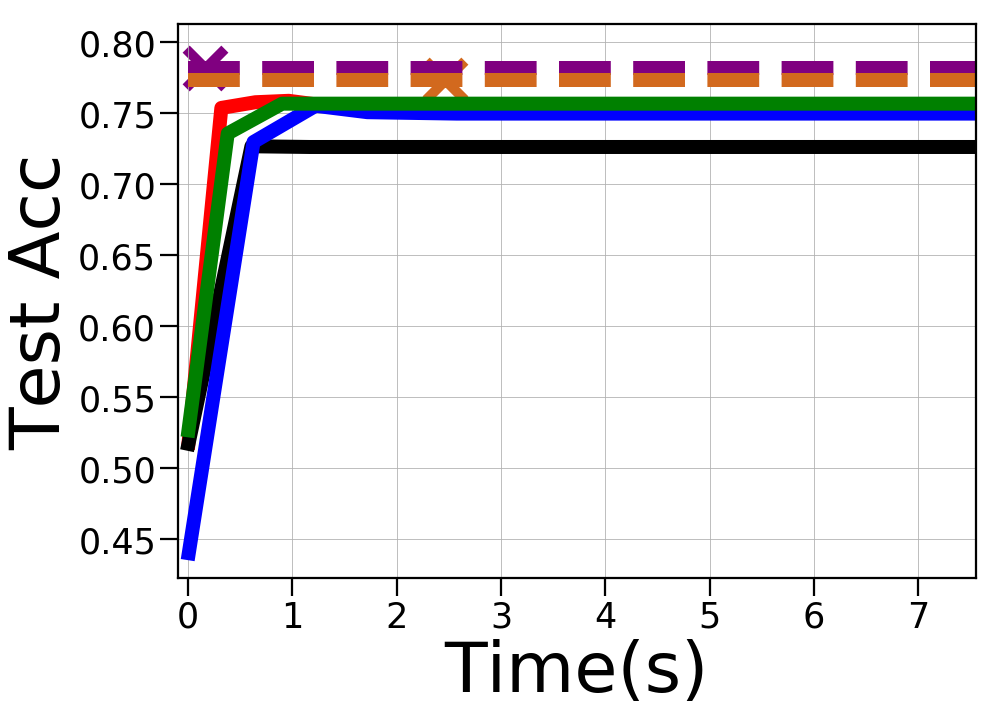

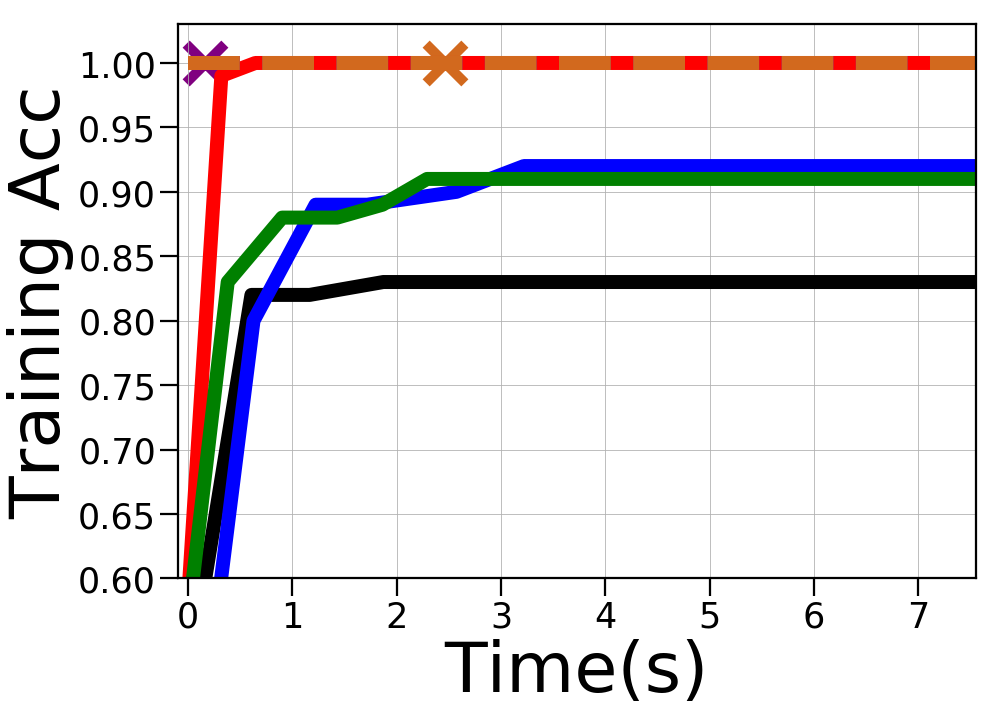

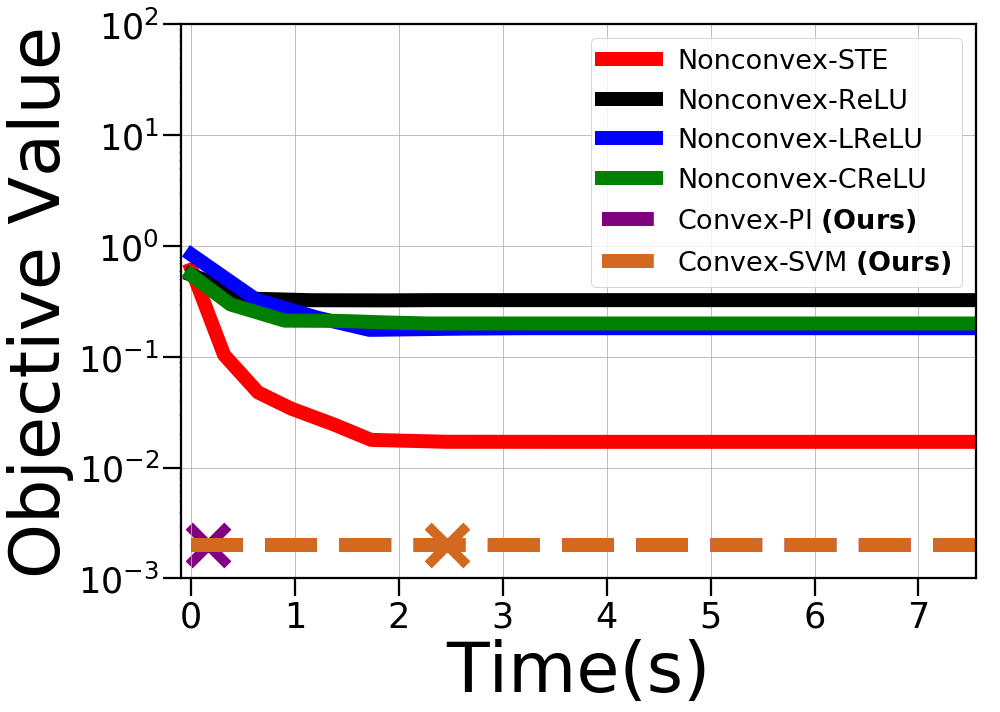

In [4]:
#######PLOTTING PART############
marker_ = 20
marker_size_ = 10
per = 100
linewdth = 5.0
tickwdth = 35
fntsize=30
import matplotlib
matplotlib.rcParams['ps.fonttype'] = 42
import plottify
from plottify import autosize
fsize_legend = 35

marker_ = 20
marker_size_ = 10
per = 100
linewdth = 5.0
tickwdth = 35
fntsize = tickwdth
#########TEST ACCURACY#########
fgsize=(14,10)
plt.figure(figsize=fgsize)
plt.plot([time_identity_3[int(per*z)] for z in range(int(nb_epoch/per))], [test_time_identity_3[int(per*z)] for z in range(int(nb_epoch/per))],color='r',linestyle='solid',markersize=marker_size_,markevery=marker_,linewidth=linewdth)
plt.plot([time_ReLU_3[int(per*z)] for z in range(int(nb_epoch/per))], [test_time_ReLU_3[int(per*z)] for z in range(int(nb_epoch/per))],color='k',linestyle='solid',markersize=marker_size_,markevery=marker_,linewidth=linewdth)
plt.plot([time_LReLU_3[int(per*z)] for z in range(int(nb_epoch/per))], [test_time_LReLU_3[int(per*z)] for z in range(int(nb_epoch/per))],color='blue',linestyle='solid',markersize=marker_size_,markevery=marker_,linewidth=linewdth)
plt.plot([time_BNN_3[int(per*z)] for z in range(int(nb_epoch/per))], [test_time_BNN_3[int(per*z)] for z in range(int(nb_epoch/per))],color='green',linestyle='solid',markersize=marker_size_,markevery=marker_,linewidth=linewdth)
# # plt.plot([time_real_ReLU_3[int(per*z)] for z in range(int(nb_epoch/per))], [test_time_real_ReLU_3[int(per*z)] for z in range(int(nb_epoch/per))],color='darkolivegreen',linestyle='solid',markersize=marker_size_,markevery=marker_,linewidth=3.0)
# plt.ylim(0.6,0.8)
xmax = min(time_identity_3[-per],time_ReLU_3[-per],time_LReLU_3[-per],time_BNN_3[-per])

plt.xlim(-0.1,xmax)
x_plot = [0]
x_plot = x_plot + [time_LReLU_3[int(per*z)] for z in range(int(nb_epoch/per))]
plt.plot(x_plot, [cvxacc_th05_3_std for _ in range(1+int(nb_epoch/per))],color='purple',linestyle='dashed',markersize=marker_size_,markevery=marker_,linewidth=linewdth*1.5)
plt.plot(x_plot, [cvxacc_th0_3_svm for _ in range(1+int(nb_epoch/per))],color='chocolate',linestyle='dashed',markersize=marker_size_,markevery=marker_,linewidth=linewdth*1.5)
plt.grid()     
plt.ylabel("Test Acc",fontsize=fntsize)
plt.xlabel("Time(s)",fontsize=fntsize)    
plt.xticks(fontsize=fntsize)
plt.yticks(fontsize=fntsize)     
autosize()
plt.scatter(std_3_time,cvxacc_th05_3_std,marker="x",s=1500,color='purple',linewidth=10)
plt.scatter(svm_3_time,cvxacc_th0_3_svm,marker="x",s=1500,color='chocolate',linewidth=10)
plt.show()   

#########TRAIN ACCURACY##########
plt.figure(figsize=fgsize)
plt.plot([time_identity_3[int(per*z)] for z in range(int(nb_epoch/per))], [train_time_identity_3[int(per*z)] for z in range(int(nb_epoch/per))],color='r',linestyle='solid',markersize=marker_size_,markevery=marker_,linewidth=linewdth)
plt.plot([time_ReLU_3[int(per*z)] for z in range(int(nb_epoch/per))], [train_time_ReLU_3[int(per*z)] for z in range(int(nb_epoch/per))],color='k',linestyle='solid',markersize=marker_size_,markevery=marker_,linewidth=linewdth)
plt.plot([time_LReLU_3[int(per*z)] for z in range(int(nb_epoch/per))], [train_time_LReLU_3[int(per*z)] for z in range(int(nb_epoch/per))],color='blue',linestyle='solid',markersize=marker_size_,markevery=marker_,linewidth=linewdth)
plt.plot([time_BNN_3[int(per*z)] for z in range(int(nb_epoch/per))], [train_time_BNN_3[int(per*z)] for z in range(int(nb_epoch/per))],color='green',linestyle='solid',markersize=marker_size_,markevery=marker_,linewidth=linewdth)
# plt.plot([time_real_ReLU_3[int(per*z)] for z in range(int(nb_epoch/per))], [train_time_real_ReLU_3[int(per*z)] for z in range(int(nb_epoch/per))],color='darkolivegreen',linestyle='solid',markersize=marker_size_,markevery=marker_,linewidth=3.0)
plt.plot(x_plot, [cvxacc_th05_3_std_training for _ in range(1+int(nb_epoch/per))],color='purple',linestyle='dashed',markersize=marker_size_,markevery=marker_,linewidth=linewdth*1.5)
plt.plot(x_plot, [cvxacc_th0_3_svm_training for _ in range(1+int(nb_epoch/per))],color='chocolate',linestyle='dashed',markersize=marker_size_,markevery=marker_,linewidth=linewdth*1.5)
plt.xlim(-0.1,xmax)
plt.grid()
plt.ylabel("Training Acc",fontsize=fntsize)
plt.xlabel("Time(s)",fontsize=fntsize)    
plt.xticks(fontsize=fntsize)
plt.yticks(fontsize=fntsize)   
plt.ylim(0.6,1.03)
autosize()
plt.scatter(std_3_time,cvxacc_th05_3_std_training,marker="x",s=1500,color='purple',linewidth=10)
plt.scatter(svm_3_time,cvxacc_th0_3_svm_training,marker="x",s=1500,color='chocolate',linewidth=10)
plt.show() 



#########OBJECTIVE VALUES############
plt.figure(figsize=fgsize)
plt.plot([time_identity_3[int(per*z)] for z in range(int(nb_epoch/per))], [loss_vals_identity_3[int(per*z)] for z in range(int(nb_epoch/per))],color='r',linestyle='solid',markersize=marker_size_,markevery=marker_,linewidth=linewdth)
plt.plot([time_ReLU_3[int(per*z)] for z in range(int(nb_epoch/per))], [loss_vals_relu_3[int(per*z)] for z in range(int(nb_epoch/per))],color='k',linestyle='solid',markersize=marker_size_,markevery=marker_,linewidth=linewdth)
plt.plot([time_LReLU_3[int(per*z)] for z in range(int(nb_epoch/per))], [loss_vals_lrelu_3[int(per*z)] for z in range(int(nb_epoch/per))],color='blue',linestyle='solid',markersize=marker_size_,markevery=marker_,linewidth=linewdth)
plt.plot([time_BNN_3[int(per*z)] for z in range(int(nb_epoch/per))], [loss_vals_bnn_3[int(per*z)] for z in range(int(nb_epoch/per))],color='green',linestyle='solid',markersize=marker_size_,markevery=marker_,linewidth=linewdth)
# plt.plot([time_real_ReLU_3[int(per*z)] for z in range(int(nb_epoch/per))], [loss_vals_realrelu_3[int(per*z)] for z in range(int(nb_epoch/per))],color='darkolivegreen',linestyle='solid',markersize=marker_size_,markevery=marker_,linewidth=3.0)
plt.plot(x_plot, [optimal_value_3_std for _ in range(1+int(nb_epoch/per))],color='purple',linestyle='dashed',markersize=marker_size_,markevery=marker_,linewidth=linewdth*1.5)
plt.plot(x_plot, [optimal_value_3_svm for _ in range(1+int(nb_epoch/per))],color='chocolate',linestyle='dashed',markersize=marker_size_,markevery=marker_,linewidth=linewdth*1.5)
plt.grid()
locs = ['best','upper left', 'lower left', 'lower right', 'center right', 'upper right']
fsize_legend = 27      
plt.ylabel("Objective Value",fontsize=fntsize)
plt.xlabel("Time(s)",fontsize=fntsize)    
plt.xticks(fontsize=fntsize)
plt.xlim(-0.1,xmax)
plt.yticks(fontsize=fntsize)
plt.yscale('log')     
plt.ylim(1e-3,100)
autosize()
plt.scatter(std_3_time,optimal_value_3_std,marker="x",s=1500,color='purple',linewidth=10)
plt.scatter(svm_3_time,optimal_value_3_svm,marker="x",s=1500,color='chocolate',linewidth=10)
plt.legend(['Nonconvex-STE','Nonconvex-ReLU','Nonconvex-LReLU','Nonconvex-CReLU','Convex-PI '+r'$\bf{(Ours)}$','Convex-SVM '+r'$\bf{(Ours)}$'],loc=locs[5], prop={'size': fsize_legend})
plt.show()